In [9]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import HDFStore
import quandl as ql

In [10]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2013, 1, 27)
end = datetime.date.today()

## Google

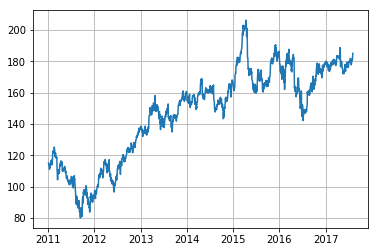

In [11]:
f = web.DataReader("FRA:MUV2", 'google', start, end)
plt.plot(f.index,f.Close)
plt.grid()
plt.show()

In [107]:
df

,Shares,Revenue,EarningsPerShare,Dividends,BookValuePerShare,OperatingCashFlow,EBTMargin,ReturnonEquity,GrossMargin,OperatingIncome,...,COGS,EBTMargin,TaxRate,NetMargin,AssetTurnoverAverage,ReturnonAssets,FinancialLeverageAverage,ReturnonEquity,ReturnonInvestedCapital,InterestCoverage
2006,1029.0,99222.0,3.64,NaN,NaN,14016.0,4.94,9.14,20.6,4661.0,...,79.40,4.94,17.69,2.13,0.77,1.65,5.56,9.14,4.66,NaN
2007,1046.0,99555.0,3.81,NaN,36.73,13108.0,9.24,11.24,24.1,7875.0,...,75.86,9.24,47.12,4.00,0.61,2.45,3.68,11.24,6.84,NaN
2008,959.0,98469.0,1.40,NaN,35.45,3212.0,2.84,3.11,21.9,2730.0,...,78.11,2.84,39.03,1.10,0.72,0.79,4.24,3.11,1.89,NaN
2009,1003.0,NaN,-2.63,NaN,29.73,10961.0,NaN,-8.58,NaN,-1513.0,...,NaN,NaN,NaN,NaN,NaN,-2.02,4.25,-8.58,-4.68,NaN
2010,1052.0,97761.0,4.28,NaN,32.28,8544.0,6.78,13.50,23.3,7274.0,...,76.71,6.78,29.48,NaN,NaN,3.40,3.73,13.50,8.22,5.51
2011,1067.0,106540.0,5.31,1.85,35.72,-696.0,7.93,14.91,24.0,8449.0,...,76.05,7.93,28.64,5.32,0.75,3.99,3.74,14.91,6.77,37.42
2012,1067.0,114297.0,6.02,2.20,38.64,-1100.0,7.10,14.60,22.3,8116.0,...,77.71,7.10,15.85,5.33,0.73,3.92,3.71,14.60,7.19,NaN
2013,1069.0,117982.0,6.40,2.20,38.42,3285.0,8.59,15.81,21.3,10139.0,...,78.70,8.59,14.00,5.80,0.71,4.13,3.95,15.81,7.21,NaN
2014,1069.0,129872.0,6.51,2.25,41.38,-1274.0,7.83,16.13,21.7,10173.0,...,78.30,7.83,28.34,5.36,0.73,3.89,4.34,16.13,6.43,NaN
2015,1069.0,149467.0,7.87,2.45,46.60,222.0,8.53,17.33,21.3,12744.0,...,78.73,8.53,31.65,5.64,0.73,4.14,4.05,17.33,6.81,NaN


2006 3.64
2007 3.81
2008 1.4
2010 4.28
2011 5.31
2012 6.02
2013 6.4
2014 6.51
2015 7.87
2016 7.64


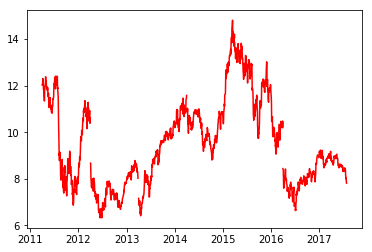

In [73]:
for year,eps in df.EarningsPerShare.iteritems():
    if eps>0:
        start = datetime.datetime(year+1,   4, 1)
        end   = datetime.datetime(year+2, 4, 1)

        f = web.DataReader("FRA:DAI", 'google', start, end)
        plt.plot(f.index,f.Close/eps,'r-')
        print year,eps
plt.show()

In [98]:
data = []
for year,e in df.EarningsPerShare.iteritems():
    if eps>0 and year>2010:
        start = datetime.datetime(year+1,   4, 1)
        end   = datetime.datetime(year+2, 4, 1)
        f = web.DataReader("FRA:DAI", 'google', start, end)
        
        minquote = f.Close.min()
        maxquote = f.Close.max()
        avgquote = f.Close.mean()
        
        print 'YEAR {0} - EPS {1} - minquote {2}  - maxquote {3}'.format(year+1, e, minquote, maxquote)

        data.append([year+1, minquote/e, avgquote/e, maxquote/e])
        
data = pd.DataFrame(data,columns=['year','mineps','avgeps','maxeps'])

YEAR 2012 - EPS 5.31 - minquote 33.55  - maxquote 46.64
YEAR 2013 - EPS 6.02 - minquote 38.59  - maxquote 69.72
YEAR 2014 - EPS 6.4 - minquote 56.35  - maxquote 94.8
YEAR 2015 - EPS 6.51 - minquote 59.0  - maxquote 90.11
YEAR 2016 - EPS 7.87 - minquote 52.25  - maxquote 72.67
YEAR 2017 - EPS 7.64 - minquote 59.68  - maxquote 69.17


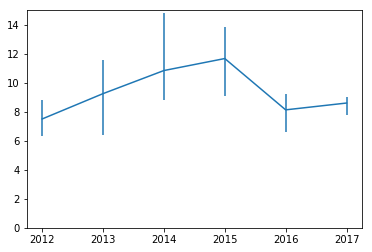

In [103]:
plt.errorbar(data.year,data.avgeps,yerr=[data.avgeps-data.mineps,data.maxeps-data.avgeps])
plt.ylim(0,15)
plt.show()

# Quandl data

In [12]:
import quandl as ql

### German stocks

In [13]:
def get_quote_quandl(isin, ticker):
    if isin[0:2]=='DE':
        exchange = "FSE"
        appendix = "X"
        
    
    key = "{0}/{1}_{2}".format(exchange,ticker,appendix)
    
    df  = ql.get(key, authtoken="CkyBkkkbzfh3ePfDF_ip")
    df  = df[['Open','High','Low','Close','Traded Volume']]
    df.columns = ['Open','High','Low','Close','Volume']
    
    return df

In [22]:
get_quote_quandl('DE1234','MUV2')

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-18,NaN,NaN,NaN,298.90,0.0
2000-01-19,NaN,NaN,NaN,300.00,0.0
2000-01-20,NaN,NaN,NaN,287.60,0.0
2000-01-21,NaN,NaN,NaN,284.50,0.0
2000-01-24,NaN,NaN,NaN,276.50,0.0
2000-01-25,NaN,NaN,NaN,265.71,0.0
2000-01-26,NaN,NaN,NaN,280.40,0.0
2000-01-27,NaN,NaN,NaN,272.80,0.0
2000-01-28,NaN,NaN,NaN,281.01,0.0


## Identify and correct for splits

In [70]:
df = ql.get("FSE/FPE3_X", authtoken="CkyBkkkbzfh3ePfDF_ip")

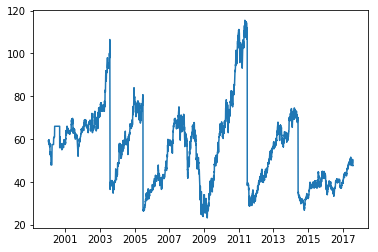

In [71]:
plt.plot(df.index, df.Close)
plt.show()

In [138]:
# split 1:3 in 2007
# idea: function to identify splits automatically!

In [80]:
splits = (relchange[relchange<-0.5]*(-1)+ 1).round()

In [81]:
 splits

Date
2003-07-28    3.0
2005-06-23    3.0
2011-06-30    3.0
2014-06-05    2.0
Name: Close, dtype: float64

In [82]:
splits.index

DatetimeIndex(['2003-07-28', '2005-06-23', '2011-06-30', '2014-06-05'], dtype='datetime64[ns]', name=u'Date', freq=None)

In [86]:
for i,splitdate in enumerate(splits.index):
    df.loc[df.index<splitdate,'Close'] = df.loc[df.index<splitdate,'Close']/splits[i]

In [84]:
splits[3]

2.0

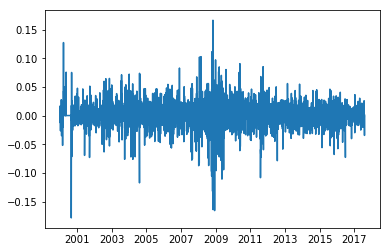

In [88]:
relchange = df.Close.diff()/df.Close
plt.plot(relchange.index,relchange)
plt.show()

In [96]:
relchange.mean(),relchange.std()

(0.0006283561357527978, 0.020139589935017372)

In [67]:
def find_splits(data):
    relchange  = data.Close.diff()/data.Close
    splitratio = (-1)*round(relchange[relchange<-1.5]) + 1
    splitdate  = relchange[relchange<-1.5].index[0]
    data.loc[data.index<splitdate,'Close'] = data.loc[data.index<splitdate,'Close']/splitratio
    return data

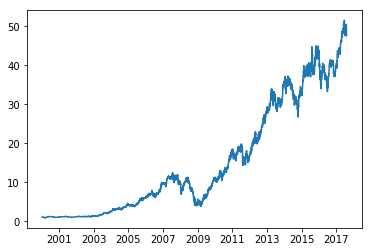

In [87]:
plt.plot(df.index,df.Close)
plt.show()

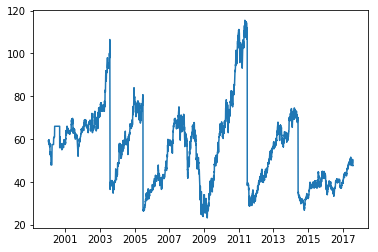

In [97]:
dfold = ql.get("FSE/FPE3_X", authtoken="CkyBkkkbzfh3ePfDF_ip")
plt.plot(dfold.index, dfold.Close)
plt.show()